In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [2]:
image=mpimg.imread('test.jpg')
print('This image is:',type(image),
     'with dimension',image.shape)
ysize=image.shape[0]
xsize=image.shape[1]
color_select=np.copy(image)

This image is: <class 'numpy.ndarray'> with dimension (646, 1147, 3)


In [3]:
red_threshold=0
green_threshold=0
blue_threshold=0
rgb_threshold=[red_threshold,green_threshold,blue_threshold]

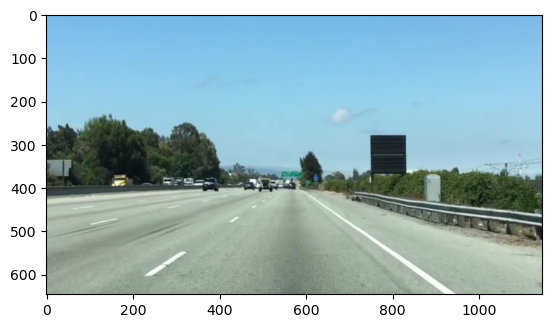

In [4]:
thresholds = (image[:,:,0] < rgb_threshold[0]) \
            | (image[:,:,1] < rgb_threshold[1]) \
            | (image[:,:,2] < rgb_threshold[2])
color_select[thresholds] = [0,0,0]
plt.imshow(color_select)
plt.show()

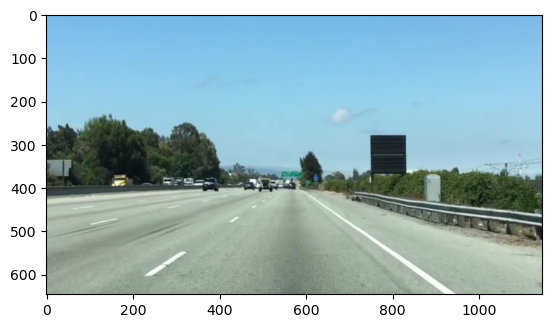

In [5]:
red_threshold=200
green_threshold=200
blue_threshold=200
thresholds = (image[:,:,0] < rgb_threshold[0]) \
            | (image[:,:,1] < rgb_threshold[1]) \
            | (image[:,:,2] < rgb_threshold[2])
# pixels below the threshold are blacked out and above are retained
color_select[thresholds]=[0,0,0]
plt.imshow(color_select)
plt.show()

This image is:  <class 'numpy.ndarray'> with dimensions: (646, 1147, 3)


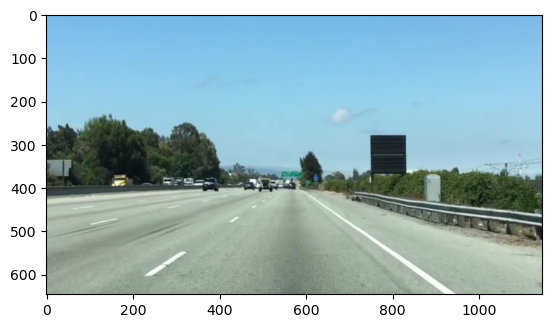

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Read in the image and print some stats
image = mpimg.imread('test.jpg')
print('This image is: ', type(image), 
         'with dimensions:', image.shape)

# Pull out the x and y sizes and make a copy of the image
ysize = image.shape[0]
xsize = image.shape[1]
region_select = np.copy(image)
# Define a triangle region of interest
left_bottom=[0,593]
right_bottom=[900,300]
apex=[400,0]
# Fit lines are used to identify the 3 sided region of interest
#np.polyfit() returns the coefficient of [A,B] of the fit
fit_left=np.polyfit((left_bottom[0],apex[0]),(left_bottom[1],apex[1]),1)
fit_right=np.polyfit((left_bottom[0],apex[0]),(left_bottom[1],apex[1]),1)
fit_bottom=np.polyfit((left_bottom[0],apex[0]),(left_bottom[1],apex[1]),1)
# Find the region inside the lines
XX,YY= np.meshgrid(np.arange(0,xsize),np.arange(0,ysize))
region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & \
                    (YY > (XX*fit_right[0] + fit_right[1])) & \
                    (YY < (XX*fit_bottom[0] + fit_bottom[1]))
# color pixels red which are inside the region of interest
region_select[region_thresholds]=[255,0,0]
plt.imshow(region_select)
#plt.show()

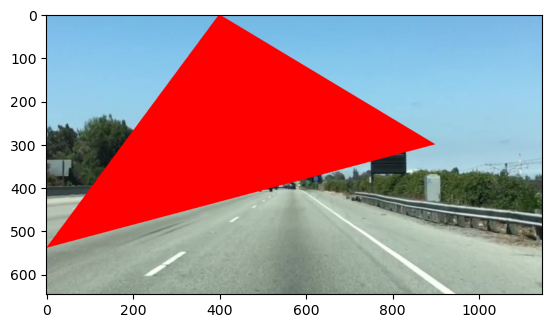

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
image=mpimg.imread('test.jpg')
ysize=image.shape[0]
xsize=image.shape[1]
color_select=np.copy(image)
line_image=np.copy(image)
#Define our color criteria
red_threshold=0
green_threshold=0
blue_threshold=0
rgb_thresholds=[red_threshold,green_threshold,blue_threshold]
# Define a triangle region of interest
left_bottom=[0,539]
right_bottom=[900,300]
apex=[400,0]
# Fit lines are used to identify the 3 sided region of interest
#np.polyfit() returns the coefficient of [A,B] of the fit
fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)
# Mask pixels below the threshold
color_thresholds = (image[:,:,0] < rgb_threshold[0]) | \
                    (image[:,:,1] < rgb_threshold[1]) | \
                    (image[:,:,2] < rgb_threshold[2])
#Find the region inside the lines
XX,YY=np.meshgrid(np.arange(0,xsize),np.arange(0,ysize))
region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & \
                    (YY > (XX*fit_right[0] + fit_right[1])) & \
                    (YY < (XX*fit_bottom[0] + fit_bottom[1]))
#mask color selection
color_select[color_thresholds]=[0,0,0]
# Find where image is both colored right and in the region 
line_image[~color_thresholds&region_thresholds]=[255,0,0]
# Display our two output images
plt.imshow(color_select)
plt.imshow(line_image)


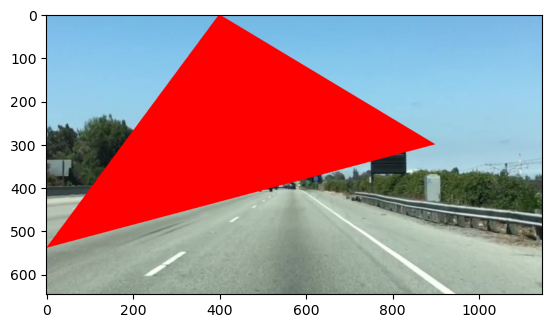

In [8]:

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Read in the image
image = mpimg.imread('test.jpg')

# Grab the x and y sizes and make two copies of the image
# With one copy we'll extract only the pixels that meet our selection,
# then we'll paint those pixels red in the original image to see our selection 
# overlaid on the original.
ysize = image.shape[0]
xsize = image.shape[1]
color_select= np.copy(image)
line_image = np.copy(image)

# Define our color criteria
red_threshold = 0
green_threshold = 0
blue_threshold = 0
rgb_threshold = [red_threshold, green_threshold, blue_threshold]

# Define a triangle region of interest (Note: if you run this code, 
# Keep in mind the origin (x=0, y=0) is in the upper left in image processing
# you'll find these are not sensible values!!
# But you'll get a chance to play with them soon in a quiz ;)
left_bottom = [0, 539]
right_bottom = [900, 300]
apex = [400, 0]

fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)

# Mask pixels below the threshold
color_thresholds = (image[:,:,0] < rgb_threshold[0]) | \
                    (image[:,:,1] < rgb_threshold[1]) | \
                    (image[:,:,2] < rgb_threshold[2])

# Find the region inside the lines
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))
region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & \
                    (YY > (XX*fit_right[0] + fit_right[1])) & \
                    (YY < (XX*fit_bottom[0] + fit_bottom[1]))
# Mask color selection
color_select[color_thresholds] = [0,0,0]
# Find where image is both colored right and in the region
line_image[~color_thresholds & region_thresholds] = [255,0,0]

# Display our two output images
plt.imshow(color_select)
plt.imshow(line_image)

# uncomment if plot does not display
# plt.show()



Canny Edge Detection 

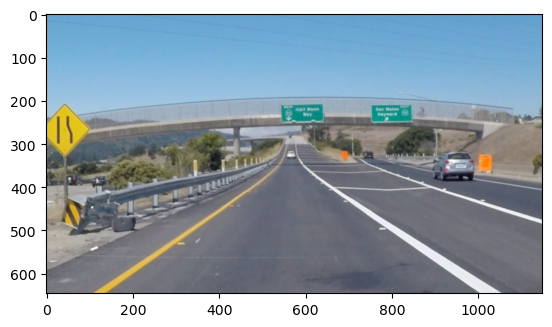

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image=mpimg.imread('exit-ramp.jpg')
plt.imshow(image)

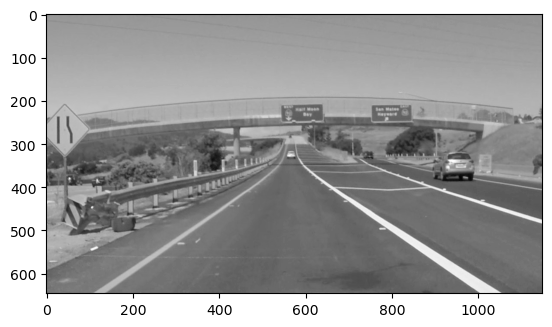

In [10]:
#canny edge=> edges=cv2.Canny(gray_image,low_threshold,high_threshold)
import cv2
#grayscale conversion 
gray=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
plt.imshow(gray,cmap='gray')

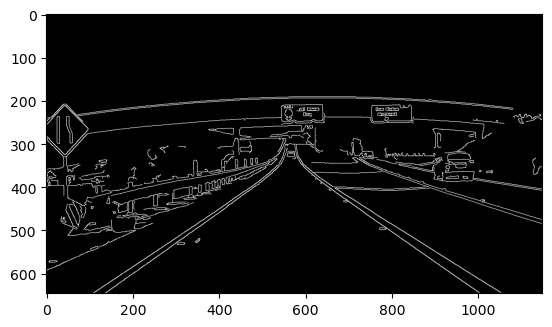

In [11]:
image=mpimg.imread('exit-ramp.jpg')
gray=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
#Defining a kernel size for Gaussian smoorthing/blurring
#By default the cv2.cany applies a 5X5 Guassian internally
kernel_size=3 # odd numbers
blur_gray=cv2.GaussianBlur(gray,(kernel_size,kernel_size),0)
# Parameters for Canny to run it
low_threshold=70
high_threshold=200
edges=cv2.Canny(blur_gray,low_threshold,high_threshold)
#Display the image
plt.imshow(edges,cmap='Greys_r')

##Hough Transformation on Edge Detected Image

In [12]:
# rho in units of pixesls and theta in units of radians. rho= distance, theta=angular resolution 
#rho takes min value of 1, theta starting can be 1 degree(pi/180 radians)
# Threshold parameter specifies the minimum number of votes(intersection in a given grid cell) a candidate line needs to have to make it into the output.
# The empty np.array([]) is just a placeholder, no need to change it. min_line_length is the minimum length of a line (in pixels) that you will accept in the output, and max_line_gap is the maximum distance (again, in pixels) between segments that you will allow to be connected into a single line.

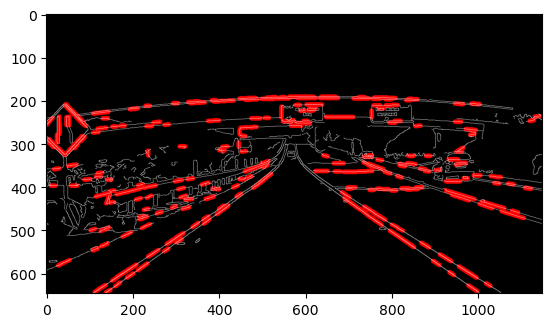

In [13]:
#lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),min_line_length, max_line_gap)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
image=mpimg.imread('exit-ramp.jpg')
gray=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
kernel_size=5
blur_gray=cv2.GaussianBlur(gray,(kernel_size,kernel_size),0)
low_threshold=50
high_threshold=150
masked_edges=cv2.Canny(blur_gray,low_threshold,high_threshold)
# Defining the Hough Transform parameters
rho=1
theta=np.pi/180
threshold=1
min_line_length=10
max_line_gap=1
line_image=np.copy(image)*0 # reating a blank image to draw lines on it
# Run Hough on edge detected image
lines=cv2.HoughLinesP(masked_edges,rho,theta,threshold,np.array([]),min_line_length,max_line_gap)
# Iterate over the output "lines" and draw lines on the blank 
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10) # cv2.line(image, pt1, pt2, color, thickness, lineType=None, shift=None)
# create a "color" binary image to combine with line image
color_edges=np.dstack((masked_edges,masked_edges,masked_edges))
# Draw the lines on the edge image
combo=cv2.addWeighted(color_edges,0.8,line_image,1,0)
plt.imshow(combo)


                           
                           

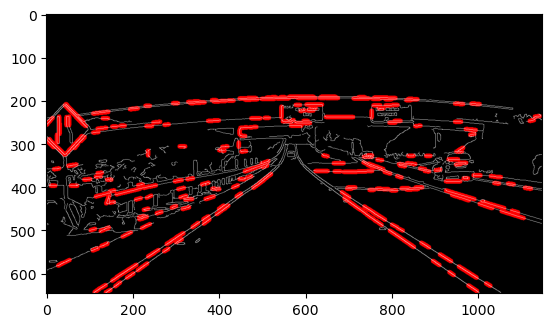

In [15]:
# Getting reasonably perfect detection using Hough Transformation
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
# Read in and grayscale the image
image=mpimg.imread('exit-ramp.jpg')
gray=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
plt.imshow(gray)
# defne the kernel size
kernel_size=5
blur_gray=cv2.GaussianBlur(gray,(kernel_size,kernel_size),0)
# Define parameters for canny
low_threshold=50
high_threshold=150
edges=cv2.Canny(blur_gray,low_threshold,high_threshold)
#creating masked edges image using cv2.fillPoly()
mask=np.zeros_like(edges)
ignore_mask_color=255
#defining a four sided polygon to mask
imshape=image.shape
vertices = np.array([[(0,imshape[0]),(450, 290), (490, 290), (imshape[1],imshape[0])]], dtype=np.int32)
cv2.fillPoly(mask, vertices, ignore_mask_color)
masked_edges = cv2.bitwise_and(edges, mask)
#Define the Hough transform parameters
#Make the blank the same size as our image to draw on 
rho=2 # distance resolution in pixels on the Hough grid
theta=np.pi/180 # angular resolution in radians of the Hough grid 
threshold=15 #minimum number of votes(intersection in Hough grid cell)
min_line_length=40 #minimum number of pixels 
max_line_gap=20 # maximum gap in pixels between connectable line segments
line_image=np.copy(image)*0# creating a blank to draw lines on 
# Run Hough on edge detected image
#Output "lines" is an array containing end points of detected line segments 
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(254,0,0),10)
#create a "color" binary image to combine with line image
color_edges=np.dstack((edges,edges,edges))
# Draw the lines on the edge image
lines_edges = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0) 
plt.imshow(lines_edges)


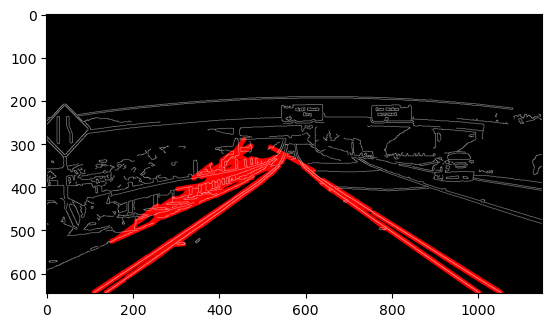

In [16]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2


# Read in and grayscale the image
image = mpimg.imread('exit-ramp.jpg')
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

# Define a kernel size and apply Gaussian smoothing
kernel_size = 5
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)

# Define our parameters for Canny and apply
low_threshold = 50
high_threshold = 150
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

# Next we'll create a masked edges image using cv2.fillPoly()
mask = np.zeros_like(edges)   
ignore_mask_color = 255   

# This time we are defining a four sided polygon to mask
imshape = image.shape
vertices = np.array([[(0,imshape[0]),(450, 290), (490, 290), (imshape[1],imshape[0])]], dtype=np.int32)
cv2.fillPoly(mask, vertices, ignore_mask_color)
masked_edges = cv2.bitwise_and(edges, mask)

# Define the Hough transform parameters
# Make a blank the same size as our image to draw on
rho = 2 # distance resolution in pixels of the Hough grid
theta = np.pi/180 # angular resolution in radians of the Hough grid
threshold = 15     # minimum number of votes (intersections in Hough grid cell)
min_line_length = 40 #minimum number of pixels making up a line
max_line_gap = 20    # maximum gap in pixels between connectable line segments
line_image = np.copy(image)*0 # creating a blank to draw lines on

# Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments
lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),
                            min_line_length, max_line_gap)

# Iterate over the output "lines" and draw lines on a blank image
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(254,0,0),10)

# Create a "color" binary image to combine with line image
color_edges = np.dstack((edges, edges, edges)) 

# Draw the lines on the edge image
lines_edges = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0) 
plt.imshow(lines_edges)

